In [1]:
%matplotlib inline
import MDAnalysis as mda
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pyemma
from pyemma.util.contexts import settings
import mdtraj as md
import itertools
from itertools import combinations
import pandas as pd
from pyemma.coordinates import source


We are importing our modules and data here

In [2]:
import featurize.featurize_dists as dists
import featurize.caller as caller

In [3]:
traj = md.load('traj_dat/w1.xtc',top='traj_dat/10.gro')
tr = 'traj_dat/10.gro'
feat = caller.feauture(tr)

In [5]:

### this is for mdtraj notation

reader = pyemma.coordinates.source(['traj_dat/w1.xtc','traj_dat/w2.xtc','traj_dat/w3.xtc'], features=feat)

Obtaining file info:   0%|                                                                                    …

In [4]:
## we then turn the output into an array so we can add our own arrays to it

# ar_test = np.array(output_2)

In [5]:
# np.shape(output_2)

Start of the MDAnalysis code imports

In [6]:
## to do: index.py that finds the CA, and other important atom groups 

Below we are naming variables for the distance analysis 

In [7]:
from pyemma.coordinates.data.featurization.misc import GroupCOMFeature
c1 = GroupCOMFeature(feat.topology, [list(range(1,367))])
c1_ = GroupCOMFeature(feat.topology, [list(range(628,33617))])
c2 = GroupCOMFeature(feat.topology, [list(range(1,2))])
c3 = GroupCOMFeature(feat.topology, [list(range(626,627))])
c4 = GroupCOMFeature(feat.topology, [list(range(128,129))])
c5 = GroupCOMFeature(feat.topology, [list(range(228,229))])
c6 = GroupCOMFeature(feat.topology, [list(range(328,339))])
c7 = GroupCOMFeature(feat.topology, [list(range(428,429))])
c8 = GroupCOMFeature(feat.topology, [list(range(528,529))])
c9 = GroupCOMFeature(feat.topology, [list(range(600,601))])
c10 = GroupCOMFeature(feat.topology, [list(range(28,29))])

Below is dictionary that we call. This should eventually be made into function to call on

In [8]:
my_dict = {}
x1 = 'c1'
my_dict[x1] = c1
x2 = 'c2'
my_dict[x2] = c2
x3 = 'c3'
my_dict[x3] = c3
x4 = 'c4'
my_dict[x4] = c4
x5 = 'c5'
my_dict[x5] = c5
x6 = 'c6'
my_dict[x6] = c6
x7 = 'c7'
my_dict[x7] = c7
x8 = 'c8'
my_dict[x8] = c8
x9 = 'c9'
my_dict[x9] = c9
x10 = 'c10'
my_dict[x10] = c10

# x11 = 'c1_'
# my_dict[x11] = c1_

In [9]:
## testing

c1

['COM-x of atom group [[1 2 3]..[364 365 366]] ', 'COM-y of atom group [[1 2 3]..[364 365 366]] ', 'COM-z of atom group [[1 2 3]..[364 365 366]] ']

In [10]:
# feat_list = ['c1','c2','c1_2','c1_3','c1_4','c1_5','c1_6','c1_7','c1_8','c1_9','c1_10']

Create trajectory list. This may get quite long. Need to create class or function for this

In [11]:
tlist=['traj_dat/w1.xtc','traj_dat/w2.xtc','traj_dat/w3.xtc']

In [12]:
n_list = []
for item in tlist:
    load = md.load(item,top = 'traj_dat/10.gro')
    n_list.append(load)

This function loops through trajectories and the differing values of the dictionary to create reader-output

In [13]:
ls=[]
def run_func():
    for traj in n_list:
        for i in my_dict:
            print('working')
            ls.append(dists.f1(traj,c1_,my_dict[i]))
            
    return ls
            

In [14]:
### Calling the function right here

l = run_func()

working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working


In [15]:
### Here I am breakign up the arrays into the chunks for their respective trajectories

splits = np.array_split(l, 3)

splits_ = np.array_split(splits[1],10)


/home/jaybraun/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [73]:
splits_

[array([array([[0.14755869],
               [0.11456558],
               [0.11933344],
               [0.08619592],
               [0.12836693]], dtype=float32)], dtype=object),
 array([array([[0.16539541],
               [0.11322872],
               [0.1116866 ],
               [0.0904365 ],
               [0.1380195 ]], dtype=float32)], dtype=object),
 array([array([[0.14589773],
               [0.09312131],
               [0.09724197],
               [0.09784275],
               [0.1293602 ]], dtype=float32)], dtype=object),
 array([array([[0.14818949],
               [0.11624283],
               [0.11963689],
               [0.08541546],
               [0.12808438]], dtype=float32)], dtype=object),
 array([array([[0.13267674],
               [0.11302398],
               [0.13334   ],
               [0.08495829],
               [0.11929825]], dtype=float32)], dtype=object),
 array([array([[0.16154696],
               [0.11857847],
               [0.11694055],
               [0.08257

In [17]:
for num in range(len(splits)):
    print(num)

0
1
2


In [18]:

def fubar(a):
    lst=[]
    for num in range(len(a)):
        b = np.array_split(splits[num],10)
        lst.append(b)
    return(lst)

In [19]:
fubar_list = []
for num in range(len(splits)):
    s = fubar(splits)
    fubar_list.append(s)
    print('done')

done
done
done


In [20]:
m = fubar(splits)

In [24]:
def iteration(array): 
    arrr = np.array(array)
    unested1 = [list(itertools.chain(*sub)) for sub in arrr]
    arr_ = [np.array(unested1)]
    
    return(arr_)

In [ ]:
# ls_1 = []
# for stuff in splits_:
#     ls_1.append(iteration(stuff))

In [49]:
# r = iteration(m)

/tmp/ipykernel_4236/2865690887.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_ = [np.array(unested1)]


In [50]:
# arr_fub = np.array(r)

In [51]:
# np.shape(arr_fub)

(1, 3, 10)

In [52]:
new = arr_fub.reshape(3,10)

In [93]:
ls5 = []
for stuff in m[1]:
    print(stuff)
    ls5.append(iteration(stuff))

[array([[0.14755869],
        [0.11456558],
        [0.11933344],
        [0.08619592],
        [0.12836693]], dtype=float32)]
[array([[0.16539541],
        [0.11322872],
        [0.1116866 ],
        [0.0904365 ],
        [0.1380195 ]], dtype=float32)]
[array([[0.14589773],
        [0.09312131],
        [0.09724197],
        [0.09784275],
        [0.1293602 ]], dtype=float32)]
[array([[0.14818949],
        [0.11624283],
        [0.11963689],
        [0.08541546],
        [0.12808438]], dtype=float32)]
[array([[0.13267674],
        [0.11302398],
        [0.13334   ],
        [0.08495829],
        [0.11929825]], dtype=float32)]
[array([[0.16154696],
        [0.11857847],
        [0.11694055],
        [0.08257832],
        [0.13933353]], dtype=float32)]
[array([[0.15910606],
        [0.11061114],
        [0.10323513],
        [0.09000509],
        [0.13377295]], dtype=float32)]
[array([[0.14382039],
        [0.10263063],
        [0.10491388],
        [0.09417542],
        [0.12529205]], 

In [97]:
ls5 = []
for chunks in range(len(m)):
    print(chunks)
    for stuff in m[chunks]:
        print(stuff)
        ls5.append(iteration(stuff))

0
[array([[0.14719187],
        [0.1432795 ],
        [0.14262521],
        [0.14506885],
        [0.15303203],
        [0.15349634],
        [0.16187276],
        [0.17277014],
        [0.15074737],
        [0.15883645],
        [0.15342948]], dtype=float32)]
[array([[0.16049285],
        [0.16512863],
        [0.16133863],
        [0.15446231],
        [0.15760697],
        [0.17137544],
        [0.16409008],
        [0.18089063],
        [0.15477055],
        [0.16116674],
        [0.1671324 ]], dtype=float32)]
[array([[0.14558569],
        [0.16318843],
        [0.15498725],
        [0.1710843 ],
        [0.1579555 ],
        [0.16455103],
        [0.16702262],
        [0.17491075],
        [0.1505077 ],
        [0.1539704 ],
        [0.15900071]], dtype=float32)]
[array([[0.1496825 ],
        [0.1417056 ],
        [0.14204256],
        [0.1454742 ],
        [0.15177049],
        [0.15422241],
        [0.16605191],
        [0.1743922 ],
        [0.15055305],
        [0.15898871],
 

In [77]:
ls5

[[array([[0.14755869, 0.11456558, 0.11933344, 0.08619592, 0.12836693]],
        dtype=float32)],
 [array([[0.16539541, 0.11322872, 0.1116866 , 0.0904365 , 0.1380195 ]],
        dtype=float32)],
 [array([[0.14589773, 0.09312131, 0.09724197, 0.09784275, 0.1293602 ]],
        dtype=float32)],
 [array([[0.14818949, 0.11624283, 0.11963689, 0.08541546, 0.12808438]],
        dtype=float32)],
 [array([[0.13267674, 0.11302398, 0.13334   , 0.08495829, 0.11929825]],
        dtype=float32)],
 [array([[0.16154696, 0.11857847, 0.11694055, 0.08257832, 0.13933353]],
        dtype=float32)],
 [array([[0.15910606, 0.11061114, 0.10323513, 0.09000509, 0.13377295]],
        dtype=float32)],
 [array([[0.14382039, 0.10263063, 0.10491388, 0.09417542, 0.12529205]],
        dtype=float32)],
 [array([[0.14236666, 0.10019356, 0.09577969, 0.10461912, 0.11987026]],
        dtype=float32)],
 [array([[0.15443738, 0.11868477, 0.11273162, 0.08620331, 0.14097705]],
        dtype=float32)]]

In [78]:
np.shape(ls5)

(10, 1, 1, 5)

In [79]:
arr = np.array(ls5)

In [80]:
stuff = arr.reshape(10,5)

In [81]:
stuff

array([[0.14755869, 0.11456558, 0.11933344, 0.08619592, 0.12836693],
       [0.16539541, 0.11322872, 0.1116866 , 0.0904365 , 0.1380195 ],
       [0.14589773, 0.09312131, 0.09724197, 0.09784275, 0.1293602 ],
       [0.14818949, 0.11624283, 0.11963689, 0.08541546, 0.12808438],
       [0.13267674, 0.11302398, 0.13334   , 0.08495829, 0.11929825],
       [0.16154696, 0.11857847, 0.11694055, 0.08257832, 0.13933353],
       [0.15910606, 0.11061114, 0.10323513, 0.09000509, 0.13377295],
       [0.14382039, 0.10263063, 0.10491388, 0.09417542, 0.12529205],
       [0.14236666, 0.10019356, 0.09577969, 0.10461912, 0.11987026],
       [0.15443738, 0.11868477, 0.11273162, 0.08620331, 0.14097705]],
      dtype=float32)

In [82]:
stuff2 = [np.transpose(stuff)]

In [83]:
stuff2

[array([[0.14755869, 0.16539541, 0.14589773, 0.14818949, 0.13267674,
         0.16154696, 0.15910606, 0.14382039, 0.14236666, 0.15443738],
        [0.11456558, 0.11322872, 0.09312131, 0.11624283, 0.11302398,
         0.11857847, 0.11061114, 0.10263063, 0.10019356, 0.11868477],
        [0.11933344, 0.1116866 , 0.09724197, 0.11963689, 0.13334   ,
         0.11694055, 0.10323513, 0.10491388, 0.09577969, 0.11273162],
        [0.08619592, 0.0904365 , 0.09784275, 0.08541546, 0.08495829,
         0.08257832, 0.09000509, 0.09417542, 0.10461912, 0.08620331],
        [0.12836693, 0.1380195 , 0.1293602 , 0.12808438, 0.11929825,
         0.13933353, 0.13377295, 0.12529205, 0.11987026, 0.14097705]],
       dtype=float32)]

In [54]:
np.shape(stuff2)

(1, 5, 10)

In [44]:
traj1 = md.load('traj_dat/w1.xtc',top='traj_dat/10.gro')
traj2 = md.load('traj_dat/w2.xtc',top='traj_dat/10.gro')
traj3 = md.load('traj_dat/w3.xtc',top='traj_dat/10.gro')

In [45]:
a_ = dists.f1(traj1,c1,c1_)
b_ = dists.f1(traj1,c2,c1_)
c_ = dists.f1(traj1,c3,c1_)
d_ = dists.f1(traj1,c4,c1_)
e_ = dists.f1(traj1,c5,c1_)
f_ = dists.f1(traj1,c6,c1_)
g_ = dists.f1(traj1,c7,c1_)
h_ = dists.f1(traj1,c8,c1_)
i_ = dists.f1(traj1,c9,c1_)
j_ = dists.f1(traj1,c10,c1_)

a_2 = dists.f1(traj2,c1,c1_)
b_2 = dists.f1(traj2,c2,c1_)
c_2 = dists.f1(traj2,c3,c1_)
d_2 = dists.f1(traj2,c4,c1_)
e_2 = dists.f1(traj2,c5,c1_)
f_2 = dists.f1(traj2,c6,c1_)
g_2 = dists.f1(traj2,c7,c1_)
h_2 = dists.f1(traj2,c8,c1_)
i_2 = dists.f1(traj2,c9,c1_)
j_2 = dists.f1(traj2,c10,c1_)

a_3 = dists.f1(traj3,c1,c1_)
b_3 = dists.f1(traj3,c2,c1_)
c_3 = dists.f1(traj3,c3,c1_)
d_3 = dists.f1(traj3,c4,c1_)
e_3 = dists.f1(traj3,c5,c1_)
f_3 = dists.f1(traj3,c6,c1_)
g_3 = dists.f1(traj3,c7,c1_)
h_3 = dists.f1(traj3,c8,c1_)
i_3 = dists.f1(traj3,c9,c1_)
j_3 = dists.f1(traj3,c10,c1_)


In [46]:
print(a_2,b_2,c_2)

[[0.14755869]
 [0.11456558]
 [0.11933344]
 [0.08619592]
 [0.12836693]] [[0.16539541]
 [0.11322872]
 [0.1116866 ]
 [0.0904365 ]
 [0.1380195 ]] [[0.14589773]
 [0.09312131]
 [0.09724197]
 [0.09784275]
 [0.1293602 ]]


In [47]:
j1 = caller.concat(a_,b_,c_,d_,e_,f_,g_,h_,i_,j_)
j2 = caller.concat(a_2,b_2,c_2,d_2,e_2,f_2,g_2,h_2,i_2,j_2)
j3 = caller.concat(a_3,b_3,c_3,d_3,e_3,f_3,g_3,h_3,i_3,j_3)


In [48]:
j2

[array([[0.14755869, 0.16539541, 0.14589773, 0.14818949, 0.13267674,
         0.16154696, 0.15910606, 0.14382039, 0.14236666, 0.15443738],
        [0.11456558, 0.11322872, 0.09312131, 0.11624283, 0.11302398,
         0.11857847, 0.11061114, 0.10263063, 0.10019356, 0.11868477],
        [0.11933344, 0.1116866 , 0.09724197, 0.11963689, 0.13334   ,
         0.11694055, 0.10323513, 0.10491388, 0.09577969, 0.11273162],
        [0.08619592, 0.0904365 , 0.09784275, 0.08541546, 0.08495829,
         0.08257832, 0.09000509, 0.09417542, 0.10461912, 0.08620331],
        [0.12836693, 0.1380195 , 0.1293602 , 0.12808438, 0.11929825,
         0.13933353, 0.13377295, 0.12529205, 0.11987026, 0.14097705]],
       dtype=float32)]

In [126]:
np.shape(j2)

(1, 5, 10)

In [37]:
arrr = np.array(j2)

In [38]:
p = arrr.reshape(5,10)

In [41]:
p[0]

array([0.14755869, 0.16539541, 0.14589773, 0.14818949, 0.13267674,
       0.16154696, 0.15910606, 0.14382039, 0.14236666, 0.15443738],
      dtype=float32)

In [28]:
np.shape(j2)

(1, 5, 10)

In [47]:
conts=j1+j2+j3

In [48]:
conts

[array([[0.14719187, 0.16049285, 0.14558569, 0.1496825 , 0.13328344,
         0.16076352, 0.15808257, 0.13984436, 0.13939598, 0.1503803 ],
        [0.1432795 , 0.16512863, 0.16318843, 0.1417056 , 0.12693761,
         0.1605821 , 0.156375  , 0.16158001, 0.15040115, 0.15354182],
        [0.14262521, 0.16133863, 0.15498725, 0.14204256, 0.12948096,
         0.16760606, 0.15064456, 0.15827435, 0.13548037, 0.14673208],
        [0.14506885, 0.15446231, 0.1710843 , 0.1454742 , 0.12934817,
         0.16909498, 0.16010065, 0.16307706, 0.14783998, 0.1521359 ],
        [0.15303203, 0.15760697, 0.1579555 , 0.15177049, 0.13670734,
         0.18620157, 0.16812669, 0.16747904, 0.14423986, 0.15728475],
        [0.15349634, 0.17137544, 0.16455103, 0.15422241, 0.13720916,
         0.18096256, 0.1645781 , 0.17294629, 0.14900592, 0.1637159 ],
        [0.16187276, 0.16409008, 0.16702262, 0.16605191, 0.14509127,
         0.18639207, 0.16544747, 0.17116797, 0.15996896, 0.17143208],
        [0.17277014, 0.1808

In [49]:
np.shape(conts)

(3,)

In [30]:
j1 = np.array(j1)
j2 = np.array(j2)
j3 = np.array(j3)

In [32]:
np.shape(j2)

(1, 500, 3)

In [33]:
resh1 = j1.reshape(1001,3)
resh2 = j2.reshape(500,3)
resh3 = j3.reshape(1001,3)

In [34]:
all1 = np.concatenate((output_2[0],resh1),axis = 1)
all2 = np.concatenate((output_2[1],resh2),axis = 1)
all3 = np.concatenate((output_2[2],resh3),axis = 1)

In [69]:
arr_list = [all1,all2,all3]

In [73]:
saving = caller.save_reader(arr_list)

In [13]:
tica_dev = pyemma.coordinates.tica(output_2,lag=3,dim=4)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [14]:
tica_out

[array([[ 0.35437158,  0.40561208,  3.3712451 , -2.5105863 ],
        [ 0.4831313 ,  0.7395312 ,  3.843192  , -2.5222602 ],
        [ 0.36665806,  0.8474561 ,  3.2553775 , -2.578952  ],
        ...,
        [-0.41138646, -1.2491075 , -0.25336963,  0.06405666],
        [-0.41207135, -1.2395322 , -0.36655766, -0.09455699],
        [-0.47736278, -1.2714888 , -0.36353666, -0.14695325]],
       dtype=float32),
 array([[ 0.47883517,  0.62307733,  4.0357203 , -2.3958502 ],
        [ 0.45076883,  0.86631936,  3.0929043 , -2.2878554 ],
        [ 0.38851136,  0.6358822 ,  3.6179543 , -2.275753  ],
        ...,
        [ 1.5958799 ,  0.4617187 , -0.42078042,  0.79103816],
        [ 1.647867  ,  0.5828426 , -0.45748875,  0.90580046],
        [ 1.5306047 ,  0.520819  , -0.50318426,  0.98805845]],
       dtype=float32),
 array([[ 0.44054782,  0.6154172 ,  3.849159  , -2.5301116 ],
        [ 0.3059386 ,  0.7074892 ,  3.504133  , -2.0588827 ],
        [ 0.15618917,  0.8487758 ,  3.666737  , -2.775487 

In [15]:
tica_concatenated

array([[ 0.35437158,  0.40561208,  3.3712451 , -2.5105863 ],
       [ 0.4831313 ,  0.7395312 ,  3.843192  , -2.5222602 ],
       [ 0.36665806,  0.8474561 ,  3.2553775 , -2.578952  ],
       ...,
       [-0.47893935, -1.4447439 , -0.5222565 , -0.3291238 ],
       [-0.38070247, -1.5402808 , -0.55072534, -0.599773  ],
       [-0.33927828, -1.5500169 , -0.47673482, -0.5308566 ]],
      dtype=float32)

In [16]:
ls = caller.make_arr(tica_concatenated)

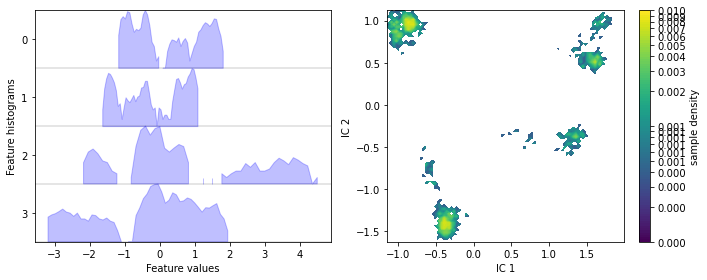

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    ls,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*ls[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('tica.png')

In [17]:
data = [coor.load(f'output_{i:03d}.npy') for i in range(120)]

NameError: name 'coor' is not defined

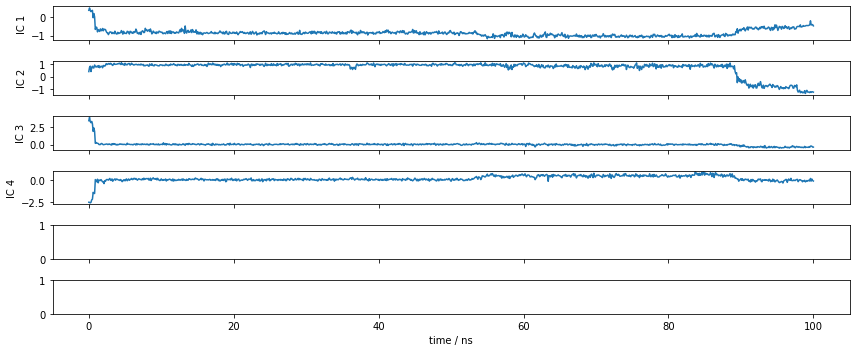

In [19]:
fig, axes = plt.subplots(6, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_out[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_out[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()
plt.savefig('ics.png')

In [21]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_out, k=15, max_iter=100, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

getting output of KmeansClustering:   0%|                                                                     …

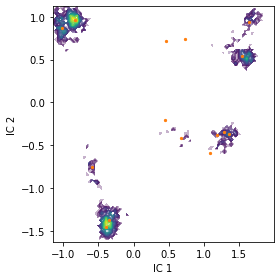

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

estimating BayesianMSM:   0%|                                                                                 …

21-10-22 08:16:12 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[8] WARNING  Changed user setting nits to the number of available timescales nits=4


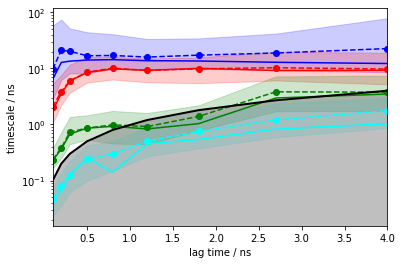

In [23]:
its = pyemma.msm.its(cluster.dtrajs, lags=40, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

In [24]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=15, dt_traj='0.2 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[10]: compute stat. inefficiencies:   0%|                       …

pyemma.msm.estimators.bayesian_msm.BayesianMSM[10]: Sampling MSMs:   0%|                                      …

fraction of states used = 0.33
fraction of counts used = 0.27


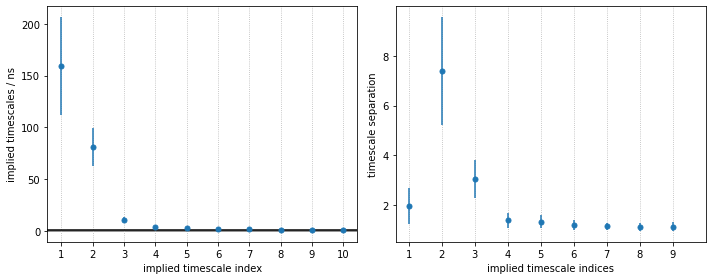

In [24]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
plt.savefig('spectral.png')

estimating BayesianMSM:   0%|                                                                                 …

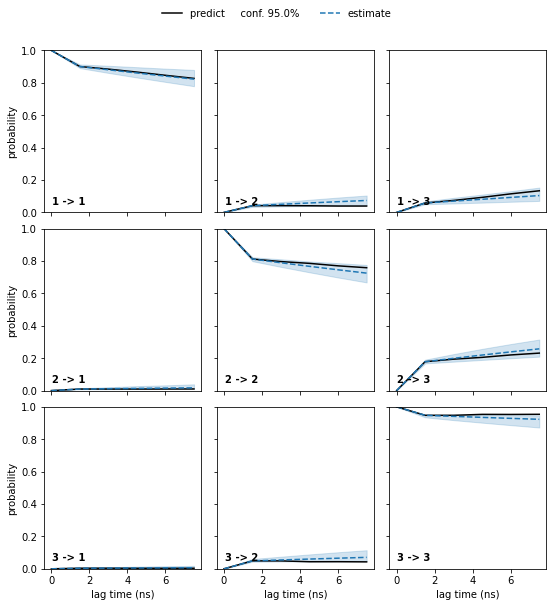

In [25]:
nstates = 3
cktest = msm.cktest(nstates, mlags=6)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');


In [28]:
msm.pcca(nstates)

PCCA(P=array([[3.63636e-02, 0.00000e+00, ..., 0.00000e+00, 8.48475e-03],
       [0.00000e+00, 5.55112e-16, ..., 0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, ..., 4.44089e-16, 0.00000e+00],
       [1.92223e-02, 0.00000e+00, ..., 0.00000e+00, 3.70370e-02]]),
   m=3)

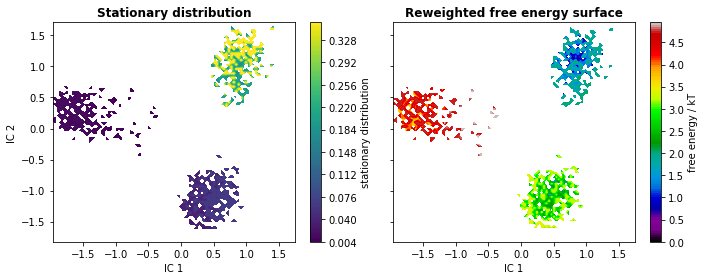

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
plt.savefig('macro_energy.png')

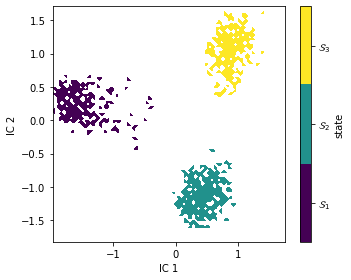

In [27]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [28]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3
1,0.00,298.50,190.35
2,1864.67,0.00,115.88
3,1973.71,329.42,0.00


In [29]:
tr=['traj_dat/whole.1.xtc','traj_dat/whole.2.xtc','traj_dat/whole.3.xtc']

In [30]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(tr, top='traj_dat/10.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./pcca{}_cont.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                                                                                    …

['./pcca1_cont.gro', './pcca2_cont.gro', './pcca3_cont.gro']

In [41]:
my_samples = [pyemma.coordinates.save_traj(tr, idist, outfile=None, top=)
              for idist in msm.sample_by_distributions(msm.metastable_distributions, 50)]

cmap = mpl.cm.get_cmap('viridis', nstates)
visualize_metastable(my_samples, cmap)

Obtaining file info:   0%|                                                  | 0/5 [00:00<?, ?it/s]

Obtaining file info:   0%|                                                  | 0/4 [00:00<?, ?it/s]

Obtaining file info:   0%|                                                  | 0/4 [00:00<?, ?it/s]

NGLWidget(max_frame=49)

print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

In [31]:
start, final = 0, 2
A = msm.metastable_sets[start]
B = msm.metastable_sets[final]
flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)

In [ ]:
# result=np.array([])
# result2=[]
# for traj in traj_list:
#     a = dists.f1(traj,c1,c2)
#     arr=np.append(a)
#     b = dists.f1(traj,c1_2,c2)
#     result2.append(b)